# Bitcoin Historical Prices & Activity 


### In this lesson, we will analyze Bitcoin prices and predict future prices. For this, we will draw conclusions with both our prophet package and statsmodels package

<a href='https://www.kaggle.com/datasets/priyamchoksi/bitcoin-historical-prices-and-activity-2010-2024' target=_blank>You can find the data file here</a>

<img src=https://cryptonomist.ch/wp-content/uploads/2023/11/prezzo-bitcoin-azionario.jpg width='400'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('bitcoin_2010-07-27_2024-04-25.csv')

In [4]:
df.head()

Start         End      Open      High       Low     Close  \
0  2024-04-24  2024-04-25  66553.54  67070.40  63742.73  64291.07   
1  2024-04-23  2024-04-24  66761.02  67174.02  65884.15  66386.61   
2  2024-04-22  2024-04-23  64952.02  67180.03  64598.00  66818.89   
3  2024-04-21  2024-04-22  64875.75  65638.74  64302.47  64896.87   
4  2024-04-20  2024-04-21  63824.06  65351.33  63321.19  64857.99   

         Volume    Market Cap  
0  1.384736e+11  1.294489e+12  
1  1.408621e+11  1.308576e+12  
2  1.400725e+11  1.299703e+12  
3  1.326574e+11  1.278730e+12  
4  1.537410e+11  1.263725e+12

In [5]:
df.shape

(5021, 8)

In [6]:
df.tail()

Start         End    Open    High     Low   Close  Volume  \
5016  2010-07-31  2010-08-01  0.0679  0.0679  0.0679  0.0679     0.0   
5017  2010-07-30  2010-07-31  0.0627  0.0627  0.0627  0.0627     0.0   
5018  2010-07-29  2010-07-30  0.0699  0.0699  0.0699  0.0699     0.0   
5019  2010-07-28  2010-07-29  0.0589  0.0589  0.0589  0.0589     0.0   
5020  2010-07-27  2010-07-28  0.0600  0.0600  0.0600  0.0600     0.0   

      Market Cap  
5016         0.0  
5017         0.0  
5018         0.0  
5019         0.0  
5020         0.0

In [7]:
df = df[['End','Close']]

In [8]:
df.head()

End     Close
0  2024-04-25  64291.07
1  2024-04-24  66386.61
2  2024-04-23  66818.89
3  2024-04-22  64896.87
4  2024-04-21  64857.99

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   End     5021 non-null   object 
 1   Close   5021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.6+ KB


In [10]:
df['End'] = pd.to_datetime(df['End'], format='%Y-%m-%d')

In [11]:
df['year']=df['End'].dt.year
df['month']=df['End'].dt.month 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   End     5021 non-null   datetime64[ns]
 1   Close   5021 non-null   float64       
 2   year    5021 non-null   int32         
 3   month   5021 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 117.8 KB


In [13]:
df = df.iloc[::-1] 
# we reverse the order from the last to the present, otherwise the staatsmodel is also wrong

In [14]:
df = df.reset_index(drop=True)

In [15]:
df.head()

End   Close  year  month
0 2010-07-28  0.0600  2010      7
1 2010-07-29  0.0589  2010      7
2 2010-07-30  0.0699  2010      7
3 2010-07-31  0.0627  2010      7
4 2010-08-01  0.0679  2010      8

In [16]:
px.line(df,x='End',y='Close',title='Bitcoin Close')

### Unfortunately, the graphic is not available on github

In [17]:
forecast_data=df.rename(columns={'End':'ds','Close':'y'}) 

In [18]:
#fit and predict
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecast=model.make_future_dataframe(periods=365) # We asked for predictions for 365 days
predictions=model.predict(forecast)
plot_plotly(model,predictions)

17:42:05 - cmdstanpy - INFO - Chain [1] start processing
17:42:06 - cmdstanpy - INFO - Chain [1] done processing


### As seen above, our Prophet Package predicts Bitcoin will be around 30K next year
### Unfortunately, the graphic is not available on github

## Now we will make predictions with statsmodels

In [18]:
import pandas as pd
from datetime import date,timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA    #(ARIMA) automatic regressive integration moving average
import statsmodels.api as sm

In [19]:
df.head()

End   Close  year  month
0 2010-07-28  0.0600  2010      7
1 2010-07-29  0.0589  2010      7
2 2010-07-30  0.0699  2010      7
3 2010-07-31  0.0627  2010      7
4 2010-08-01  0.0679  2010      8

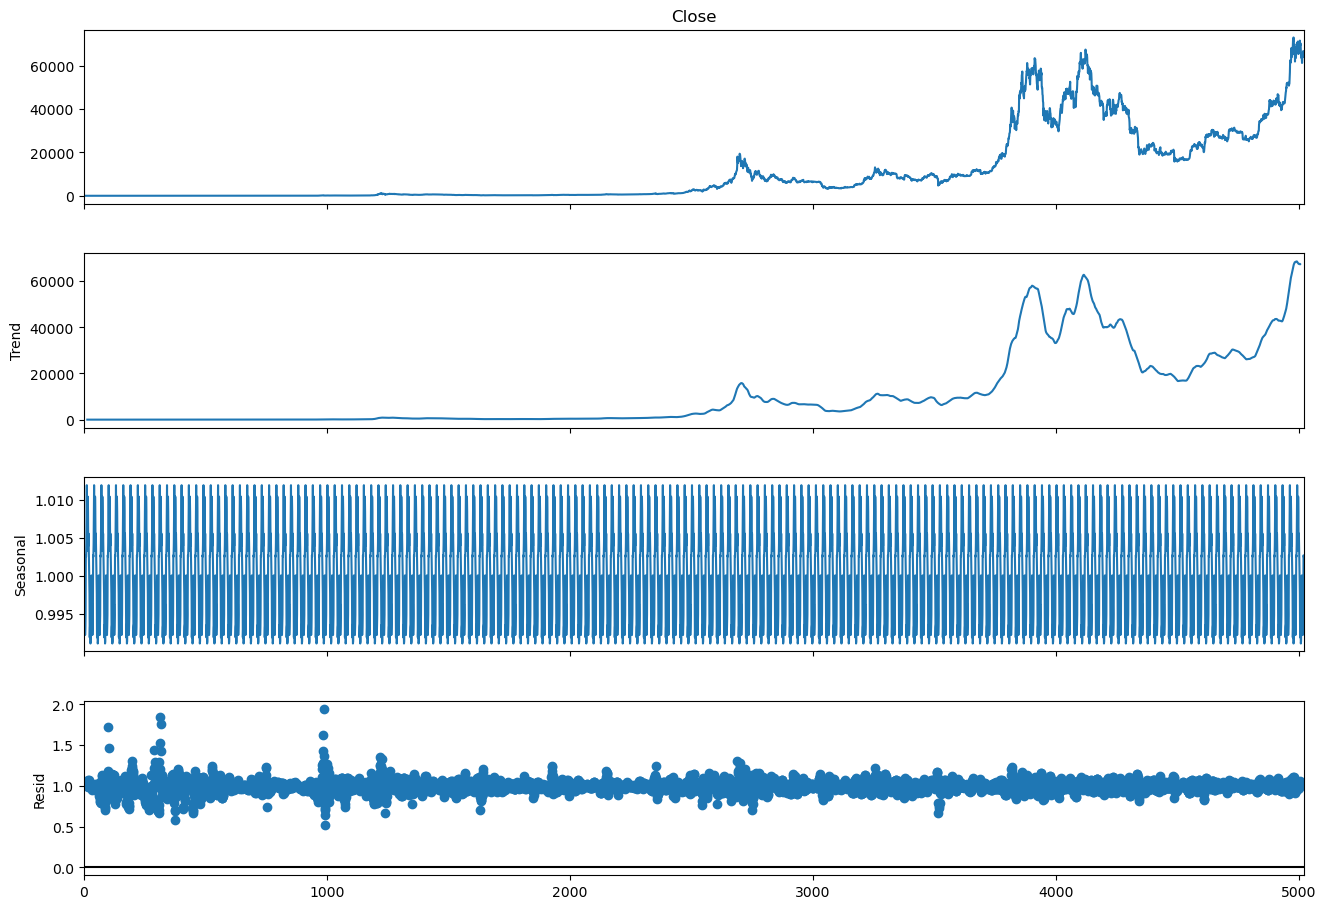

In [20]:
result=seasonal_decompose(df['Close'],model='multiplicate',period=30) #We will get 30 period data

fig=result.plot()
fig.set_size_inches(15,10) 

In [21]:
pd.plotting.autocorrelation_plot(df['Close'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

In [22]:
model=sm.tsa.statespace.SARIMAX(df['Close'])
results=model.fit()
results.summary() 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10749D+02    |proj g|=  8.05221D+02

At iterate    5    f=  1.25079D+01    |proj g|=  7.66247D+00

At iterate   10    f=  8.31399D+00    |proj g|=  3.17209D-01

At iterate   15    f=  7.99954D+00    |proj g|=  1.34557D-02

At iterate   20    f=  7.97409D+00    |proj g|=  5.82022D-04

At iterate   25    f=  7.97192D+00    |proj g|=  2.45978D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     27     28      1     0     0   

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5021
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -40026.450
Date:                Wed, 01 May 2024   AIC                          80056.900
Time:                        15:48:59   BIC                          80069.943
Sample:                             0   HQIC                         80061.471
                               - 5021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.000   4934.392      0.000       0.999       1.000
sigma2      4.911e+05   2854.483    172.030      0.000    4.85e+05    4.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   9.23   Jarque-Bera (JB):             97700.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            3880.39   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
predictions=results.predict(len(df),len(df)+365)
predictions  

5021    64268.469836
5022    64245.877616
5023    64223.293338
5024    64200.716999
5025    64178.148597
            ...     
5382    56607.695263
5383    56587.796026
5384    56567.903785
5385    56548.018536
5386    56528.140278
Name: predicted_mean, Length: 366, dtype: float64

<Axes: >

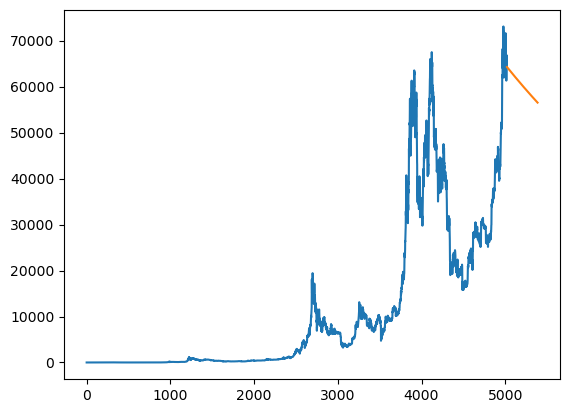

In [24]:
df['Close'].plot()
predictions.plot()

### stattsmodel predicts it will drop to 56K next year with our package